In [1]:
# import the necessary packages for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import json
import re
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline

### Gathering the Data

Reading in the csv file provide

In [2]:
# read in the csv archive
archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')

Using requests to pull the tsv file

In [3]:
# store the url in a variable for brevity in the main block of code
response_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# send http request to the url, store result
response = requests.get(response_url)
# open and write the result to a tsv file
with open('image_prediction.tsv',mode='wb')as file:
    file.write(response.content)
# read in the tsv using tab delimited read_csv
prediction_df=pd.read_csv('image_prediction.tsv',delimiter='\t')

Reading in the provided json file and exploring the structure to build the dataframe

In [4]:
# for brevity / deadline purposes, I downloaded the results of the API call. I have used API's before and understand the calls
# made within the provided code

# open the text file, read in by line (each line on it's own is valid JSON, but the whole document is not)
# append each line as a list element
tweets_json_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweets_json_list.append(json.loads(line))
file.close()

In [5]:
# print first element to better understand the dict structure before translating to dataframe
# it appears the necessary info for this project is in the first "layer" of the dictionary of
# each element
tweets_json_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [6]:
# create a blank dataframe to populate
json_df = pd.DataFrame()

# use lambda functions as the syntax is much cleaner than for loop iteration to iterate through tweets_json_list
# then use fact that each element is a dictionary and pull the value using the relevant key
# after this, list(map()) creates a list of results to # populate the dataframe column with
json_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_json_list))
json_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_json_list))
json_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_json_list))
json_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_json_list))

### Assessing the Data

In [7]:
# examine data structure of each column and values
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
#print random sample, note the NaN rather than None values in certain columns
archive_df.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
450,818646164899774465,NaN,NaN,2017-01-10 02:30:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Seamus. He's very bad a...,8.083449e+17,4.196984e+09,2016-12-12 16:16:49 +0000,"https://vine.co/v/5QWd3LZqXxd,https://vine.co/...",11,10,Seamus,None,None,None,None
1462,694905863685980160,NaN,NaN,2016-02-03 15:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's a Bisquick Taj Mapaw. Too...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694905863...,10,10,Archie,None,None,None,None
1119,731285275100512256,NaN,NaN,2016-05-14 00:49:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Solomon. He's a Beneroo Cumberflop. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731285275...,12,10,Solomon,None,None,None,None
1616,685198997565345792,NaN,NaN,2016-01-07 20:39:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. That is his time machine. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685198997...,11,10,Alfie,None,None,None,None
1218,714957620017307648,NaN,NaN,2016-03-29 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's an Albino Haberdasher. Te...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714957620...,10,10,Curtis,None,None,None,None
392,826115272272650244,NaN,NaN,2017-01-30 17:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ike. He's demonstrating the pupmost re...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826115272...,13,10,Ike,None,None,None,None
409,823333489516937216,8.233264e+17,1.582854e+09,2017-01-23 00:56:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@HistoryInPics 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1020,746757706116112384,NaN,NaN,2016-06-25 17:31:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Maddie. She gets some wicked air time....,NaN,NaN,NaN,https://vine.co/v/5BYq6hmrEI3,11,10,Maddie,None,None,None,None
1320,706346369204748288,NaN,NaN,2016-03-06 05:11:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. She's a Beneboom Cumberwiggle. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706346369...,12,10,Koda,None,None,None,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302...,13,10,Tucker,None,None,None,None


In [9]:
# count occurences of source href
archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [10]:
# count occurences of retweet status
archive_df['retweeted_status_id'].isnull().value_counts()

True     2175
False     181
Name: retweeted_status_id, dtype: int64

In [11]:
# count number of tweets without pictures
archive_df['expanded_urls'].isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

In [12]:
# print a unique list of dog names to inspect, note the lowercase words mixed in
print(archive_df['name'].unique())

['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' 'None' 'Jax' 'Zoey' 'Cassie'
 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus' 'Canela'
 'Gerald' 'Jeffrey' 'such' 'Maya' 'Mingus' 'Derek' 'Roscoe' 'Waffles'
 'Jimbo' 'Maisey' 'Lilly' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah' 'Bella'
 'Grizzwald' 'Rusty' 'Gus' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary' 'a'
 'Elliot' 'Louis' 'Jesse' 'Romeo' 'Bailey' 'Duddles' 'Jack' 'Emmy' 'Steven'
 'Beau' 'Snoopy' 'Shadow' 'Terrance' 'Aja' 'Penny' 'Dante' 'Nelly' 'Ginger'
 'Benedict' 'Venti' 'Goose' 'Nugget' 'Cash' 'Coco' 'Jed' 'Sebastian'
 'Walter' 'Sierra' 'Monkey' 'Harry' 'Kody' 'Lassie' 'Rover' 'Napolean'
 'Dawn' 'Boomer' 'Cody' 'Rumble' 'Clifford' 'quite' 'Dewey' 'Scout' 'Gizmo'
 'Cooper' 'Harold' 'Shikha' 'Jamesy' 'Lili' 'Sammy' 'Meatball' 'Paisley'
 'Albus' 'Neptune' 'Quinn' 'Belle' 'Zooey' 'Dave' 'Jersey' 'Hobbes' 'Burt'
 'Lorenzo' 'Carl' 'Jordy' 'Milky' 'Trooper' 'Winston' 'Sophie' 'Wyatt'
 'Rosie' 'Thor' 'Oscar' 'Luna' 'Callie' 'Cermet' 'George'

In [13]:
# exploring rating numerator values. note some of the very large / small for exploration later
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
#print info summary for image prediction frame
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#display random sample of prediction
prediction_df.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
931,703079050210877440,https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg,2,Pembroke,0.778503,True,Shetland_sheepdog,0.093834,True,Cardigan,0.060296,True
192,669567591774625800,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg,1,Chihuahua,0.980511,True,toy_terrier,0.009166,True,miniature_pinscher,0.002659,True
369,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False
1403,769212283578875904,https://pbs.twimg.com/media/CqzKfQgXEAAWIY-.jpg,1,golden_retriever,0.166538,True,Pekinese,0.148215,True,cocker_spaniel,0.082735,True
735,687096057537363968,https://pbs.twimg.com/media/CYkON6CVAAAPXAc.jpg,1,Labrador_retriever,0.417107,True,Chesapeake_Bay_retriever,0.341730,True,German_short-haired_pointer,0.177702,True
1182,738402415918125056,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1,cocker_spaniel,0.346695,True,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True
1693,816014286006976512,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,English_setter,0.677408,True,Border_collie,0.052724,True,cocker_spaniel,0.048572,True
724,686034024800862208,https://pbs.twimg.com/media/CYVIToGWQAAEZ_y.jpg,1,Great_Dane,0.236920,True,Irish_wolfhound,0.117608,True,Greater_Swiss_Mountain_dog,0.103900,True
209,669972011175813120,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,1,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False
1367,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,0.393118,False,canoe,0.178088,False,lakeside,0.099713,False


In [16]:
#show info on json data frame
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
#print first 5 rows
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Documenting Quality and Tidyness Issues

**Quality**
1. The archive and json datasets should have no posts with retweets
2. Their should be no tweets with no images
3. Their are clearly incorrect dog names (a, the, an, officially, etc.)
4. id should be a string across all three data frames 
5. timestamps are not date time objects
6. tweet sources have complicated href strings that are difficult to make sense of
7. Decimal ratings in numerator / denominator are incorrectly formatted in rating numerator and denominator
8. NaN values should be null in the dataframes


**Tidiness**
1. Each of the different data files should be joined together 
2.The dog stages should be consolidated to one column 
3. Drop unnecessary columns from the df

### Cleaning

In [18]:
# create clean copies of all dataframes 
archive_clean = archive_df.copy()
prediction_clean = prediction_df.copy()
json_clean = json_df.copy()


1)
**Issue**

There should be no entries that are retweets in the archive dataframe

**Define**

Delete Retweets

In [19]:
# find and remove all entries that are retweets
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

**Test**

In [20]:
# test should give 0 non-null values in retweeted_status_id
archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

2) **Issue**

There should be no tweets without images in the archive dataframe

**Define**

Remove posts without expanded urls

In [21]:
# remove posts with null image urls
archive_clean = archive_clean.dropna(subset=['expanded_urls'])


**Test**

In [22]:
# should print an empty dataframe (this is all entries that are null)
archive_clean[archive_clean['expanded_urls'].isnull()]
print(archive_clean.shape)

(2117, 17)


3)
**Issue**

There are clearly incorrect dog names in the archive, linked to lower case only values in names

**Define**

Determine names with only lowercase values, then check to see if "named" or "name is" in the text field of the post to determine the actual name. Replace with the actual name if available, otherwise replace with non 



In [23]:
# replace the singuler O entry that should be O'Malley
archive_clean['name'] = archive_clean['name'].replace("O", "O'Malley")


# create an index using regex to find names that are all lowercase, with post text that has named or name is in it
new_name_index = (archive_clean.loc[(archive_clean['name'].str.islower())
                                             & (archive_clean.text.str.contains('named|name is'))]).index.tolist()

# create a loop that for each element in the index, takes the post text and uses regex to save the name to an empty list
# at each if statement if the list is empty then there are no "hits"
#  iterate through until all index values are searched
for row in new_name_index:
    text = archive_clean.loc[row, 'text']
    new_name = []
    # if new_name is empty enter the condition
    if new_name:
        new_name = re.findall(r"named\s(\w+)", text)
        #join new name to get a string that can be put into the dataframe
        archive_clean.at[row, 'name'] = ''.join(new_name)
    if new_name:
        new_name = re.findall(r"name is\s(\w+)", text)
        archive_clean.at[row, 'name'] = ''.join(new_name)

# for variables that do not trip the named, name is regex this sets the names to null        
no_name_index = archive_clean.loc[(archive_clean['name'].str.islower())].index.tolist()
for row in no_name_index:
    archive_clean.at[row, 'name'] = "None"



**Test**

In [24]:
# check for no more lower case strings in name
archive_clean['name'].str.islower().sum()

0

4) **Issue**

ID should be a string across all three dataframes

**Define**

change variable type to string

In [25]:
# change all tweet_ids to be strings. this prevents operations from being performed on them as if they were standard
#integers
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
prediction_clean['tweet_id'] = prediction_clean['tweet_id'].astype(str)
json_clean['tweet_id'] = json_clean['tweet_id'].astype(str)

**Test**

In [26]:
# print each of the info()'s to verify the change
print(archive_clean.info())
print(prediction_clean.info())
print(json_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(4), int64(2), object(

5)
**Issue**

the timestamp column in the archive frame is not a datetime python variable


**Define**

change the format to datetime

In [27]:
#change the timestamp to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

**Test**

In [28]:
#verify the type change to datetime
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns](1), fl

6) **Issue**

archive source href tags are difficult to read and obscure the source

**Define**

utilize regez to identify the source at the end of the href code

In [29]:
# regex code to pull the source out of the end of the href tag and replace the existing value
archive_clean['source'] = archive_clean['source'].str.extract(r">(.+)<")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


**Test**

In [30]:
# check that all existing values are clear and without href or other tag
archive_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

7) 
**Issue**

Rating numerator and denominator should be floats, there are ratings that should be decimal values based on various tweets' text

**Define**

right a regex to identify those rows in the data frame, then either manually change the values or create a loop if the # is too large

In [31]:
# First we have to change the numerator and denominator columns to be a float
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float')
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype('float')

In [32]:
# find the index of rows that meet the regex condition of having a decimal numerator 
archive_clean[archive_clean['text'].str.contains(r"\d+\.\d*\/\d+")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,None,None,pupper,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,None,None,None,None


In [33]:
# checking text values in excel, will fill manually since there are only 4
archive_clean.at[45,'rating_numerator'] = 13.5
archive_clean.at[695,'rating_numerator'] = 9.75
archive_clean.at[763,'rating_numerator'] = 11.27
archive_clean.at[1712,'rating_numerator'] = 11.26

**Test**

In [34]:
# make sure that the selected and altered rows meet the earlier regex condition
archive_clean[archive_clean['text'].str.contains(r"\d+\.\d*\/\d+")]['rating_numerator']


45      13.50
695      9.75
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64

8)
**Issue**

Extra characters after ampersands in certain text row of the archive df

**Define**

for affected rows replace '&amp;' with '&')

In [35]:
# string replacement that finds and replaces &amp; with &
archive_clean['text'] = archive_clean['text'].str.replace('&amp;', '&')

**Test**

In [36]:
#verify that no &amp; exist in the text field
archive_clean[archive_clean['text'].str.contains('&amp;')]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Tidiness

**Issue**

The dog stages are spread across 4 columns

**Define** 

use melt to merge the columns  and transform the "wide" columns to a long format

In [37]:
# list the columns to be melted / merged
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
# gather the names that won't be melted
columns_to_stay = [x for x in archive_clean.columns.tolist() if x not in melt_columns]
#melt the columns together
archive_clean = pd.melt(archive_clean, id_vars = columns_to_stay, value_vars = melt_columns, 
                         var_name = 'stages', value_name = 'dog_stage')
# drop the spurious stages column
archive_clean = archive_clean.drop('stages', 1)

#print the value counts before removing dupes
print(archive_clean.dog_stage.value_counts())

#remove duplicates, keeping the last record (melt creates rows, this threw me for a bit when merging below)
archive_clean = archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

print(archive_clean.dog_stage.value_counts())

None       8118
pupper      232
doggo        84
puppo        24
floofer      10
Name: dog_stage, dtype: int64
None       1779
pupper      232
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64


**Test**

In [38]:
# verify that the new column is accurate and other dog stages have been removedd
archive_clean.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2041,667405339315146752,NaN,NaN,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667405339...,7.0,10.0,Biden,None
2040,667435689202614272,NaN,NaN,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667435689...,12.0,10.0,None,None
2039,667437278097252352,NaN,NaN,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,10.0,10.0,None,None
2038,667443425659232256,NaN,NaN,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667443425...,6.0,10.0,None,None
2037,667453023279554560,NaN,NaN,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,None


In [39]:
#verify the consolidation to one column
archive_clean.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2041,667405339315146752,NaN,NaN,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667405339...,7.0,10.0,Biden,None
2040,667435689202614272,NaN,NaN,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667435689...,12.0,10.0,None,None
2039,667437278097252352,NaN,NaN,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,10.0,10.0,None,None
2038,667443425659232256,NaN,NaN,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667443425...,6.0,10.0,None,None
2037,667453023279554560,NaN,NaN,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,None


**Issue**

The dataframes must be merged

**Define**

use pd.merge to combine the datasets

In [40]:
# merge each of the datasets using left joins on tweet_id
master_df = pd.merge(left = archive_clean, right = json_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')
master_df = master_df.merge(prediction_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

**Test**

In [41]:
# print info to make sure all variables have been joined and that there are no duplicated rows
master_df.drop_duplicates(inplace = True)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1994 non-null object
dog_stage                     1994 non-null object
retweet_count                 1994 non-null int64
favorite_count                1994 non-null int64
jpg_url                       1994 non-null object
img_num                    

In [42]:
master_df.to_csv("Twitter_Archive_Master.csv", header=True, index=False, encoding='utf-8', sep="\t")

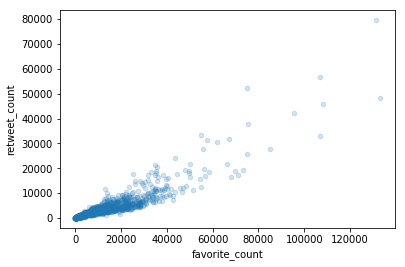

In [49]:
master_df.plot(x='favorite_count', y = 'retweet_count', kind = 'scatter', alpha = .20)

We can confirm the idea that favorites happen more readily than retweets by looking at histograms of both counts overlaid in the same graph. We can see that both distributions are right skewd, but that the tail of favorites is much fatter than retweets.

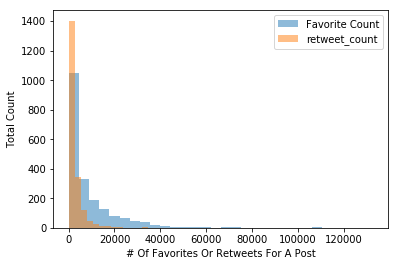

In [52]:
plt.hist(master_df_timeindex['favorite_count'], bins = 30,alpha =.5,label = 'Favorite Count')
plt.hist(master_df_timeindex['retweet_count'], bins = 30,alpha =.5,label = 'retweet_count')
plt.xlabel('# Of Favorites Or Retweets For A Post')
plt.ylabel('Total Count')
plt.legend()
plt.show()

###Dog Stages and Popularity

WeRateDogs has evolved a specialized language to describe various dogs and their personality or appearance. We can see below that pupper is the most seen nomenclature by far from the value counts table and the bar chart. It may be of interest to explore dog stages by quality, and popularity using retweets and favorites.

In [ ]:
master_df_timeindex[master_df_timeindex['dog_stage']!='None']['dog_stage'].value_counts().plot(kind='bar')

In [44]:
master_df_timeindex['dog_stage'].value_counts()

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

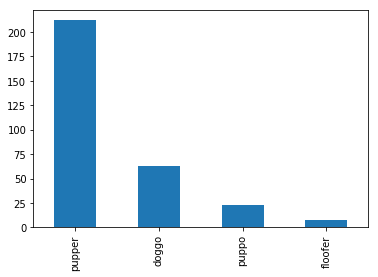

In [45]:
master_df_timeindex[master_df_timeindex['dog_stage']!='None']['dog_stage'].value_counts().plot(kind='bar')

The most common dog stage in the dataset is "pupper". What are the mean ratings like

In [46]:
master_df_timeindex[master_df_timeindex['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo      11.888889
floofer    11.875000
pupper     10.652217
puppo      12.043478
Name: rating_numerator, dtype: float64

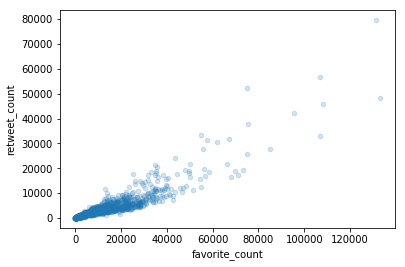

In [47]:
master_df_timeindex.plot(x='favorite_count', y = 'retweet_count', kind = 'scatter', alpha = .20)

retweent and favorite count are positively correlated

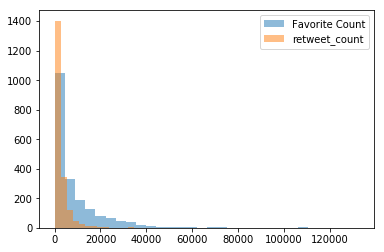

In [48]:
plt.hist(master_df_timeindex['favorite_count'], bins = 30,alpha =.5,label = 'Favorite Count')
plt.hist(master_df_timeindex['retweet_count'], bins = 30,alpha =.5,label = 'retweet_count')
plt.legend()
plt.show()

the distributions for both favorite count and retweet count are right skewed. The tail on favorite count is much fatter than retweet count, suggesting people are less apt to retweet a post.